![Patrones](https://drive.google.com/uc?export=view&id=1FVBEDeOK1dmp3cpfhbq82lA-eI0ZZJW1)

# **`Challenge 8 `**
    
## <center>Acerca de los datos </center>

​**Este conjunto de datos contiene 2126 registros de características extraídas de exámenes de Cardiotocograma, que luego fueron clasificados por un obstetra experto en 3 clases: "Normal", "Suspect" y "Pathological". El conjunto de datos contiene las siguientes características:**
    
* **baseline value:** Valor de línea base de la frecuencia cardíaca fetal (FHR) (latidos por minuto)   
* **accelerations:** Número de aceleraciones por segundo
* **fetal_movement:** Número de movimientos fetales por segundo    
* **uterine_contractions:** Número de contracciones uterinas por segundo
* **light_decelerations:** Número de desaceleraciones leves (LDs) por segundo
* **severe_decelerations:** Número de desaceleraciones severas (SDs) por segundo
* **prolongued_decelerations:** Número de desaceleraciones prolongadas (PDs) por segundo
* **abnormal_short_term_variability:** Porcentaje de tiempo con variabilidad anormal a corto plazo
* **mean_value_of_short_term_variability:** Valor medio de la variabilidad a corto plazo
* **percentage_of_time_with_abnormal_long_term_variability:** Porcentaje de tiempo con variabilidad anormal a largo plazo
* **mean_value_of_long_term_variability:** Valor medio de la variabilidad a largo plazo
* **histogram_width:** Ancho del histograma creado usando todos los valores de un registro
* **histogram_min:** Valor mínimo del histograma
* **histogram_max:** Valor máximo del histograma
* **histogram_number_of_peaks:** Número de picos en el histograma del examen
* **histogram_number_of_zeroes:** Número de ceros en el histograma del examen
* **histogram_mode:** Modo del histograma
* **histogram_mean:** Media del histograma
* **histogram_median:** Mediana del histograma
* **histogram_variance:** Varianza del histograma
* **histogram_tendency:** Tendencia del histograma
* **fetal_health:** Codificado como 1-Normal(Normal); 2-Sospechoso(Suspect); 3-Patológic(Pathological). **TARGET**



<br>

Datos extraidos de :

https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification <br>

<br>


> Nota <br> Si la base de datos es usada para investigación citar a: <br>
    `Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318`. [<small>DOI: 10.1002/1520-6661(200009/10)9:5<311::AID-MFM12>3.0.CO;2-9</small>](https://doi.org/10.1002/1520-6661(200009/10)9:5%3C311::AID-MFM12%3E3.0.CO;2-9)
<br>

___


### Sobre el Challenge

Implementar cada paso en Python

1.	Utilizar todos los conocimientos adquiridos en el curso.
2.	Escoger las variables usadas para clasificar, y la variable objetivo.

  a. Si la variable objetivo no tiene categorías, crear categorías basadas en intervalos de valores. Por ejemplo, si nuestra variable va del 1 al 10,  podemos crear 5 categorías: categoría1(1-2), categoría2(3-4), categoría3(5-6), categoría4(7-8),categoría5(9-10)<br>
  b. Crear al menos 2 de los modelos de clasificación visto en clase y un modelo de clasificación k-vecinos, donde k es nuestro número de categorías.<br>
  c. 	Dividir el conjunto en entrenamiento y prueba.<br>
  d.	Evaluar nuestro modelo (incluir validación cruzada).<br>
  e.	Generar gráficos de nuestros resultados.<br>



**Todas estas salidas deberán ser reportadas en un documento.**


In [99]:
#Librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
df = pd.read_csv("https://github.com/ulewis/Ejemplos/raw/main/Datos/fetal_health.csv")
df.head()  # vemos los 5 primeros datos del dataframe

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


###Preprocesamiento


In [101]:
df.shape

(2126, 22)

Tenemos 2126 datos


Ver Features

In [102]:
df.iloc[0,:]

baseline value                                            120.0
accelerations                                               0.0
fetal_movement                                              0.0
uterine_contractions                                        0.0
light_decelerations                                         0.0
severe_decelerations                                        0.0
prolongued_decelerations                                    0.0
abnormal_short_term_variability                            73.0
mean_value_of_short_term_variability                        0.5
percentage_of_time_with_abnormal_long_term_variability     43.0
mean_value_of_long_term_variability                         2.4
histogram_width                                            64.0
histogram_min                                              62.0
histogram_max                                             126.0
histogram_number_of_peaks                                   2.0
histogram_number_of_zeroes              

In [103]:
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

No hay valores nulos

In [104]:
df.isna().sum().sum()

0

¿Qué tipo de datos tenemos?


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

LA ULTIMA VARIABLE ES EL TARGET, SE DEBE CAMBIAR A ENTERO

 1-Normal(Normal); 2-Sospechoso(Suspect); 3-Patológic(Pathological).

In [106]:
df['fetal_health'] = df['fetal_health'].astype(int)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

Relación de los datos

In [108]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


####Análisis de Varianza (ANOVA)
 ANOVA para cada feature y el target para ver si hay diferencias estadísticamente significativas en las medias de los grupos.

In [109]:
import scipy.stats as stats

# La lista de columnas de features, excluyendo  'Target'
features = df.columns[:-1]

# Diccionario para guardar los p-valores de las pruebas ANOVA
anova_results = {}

for feature in features:
    grupos = []
    for categoria in df['fetal_health'].unique():
        grupos.append(df[df['fetal_health'] == categoria][feature].dropna())

    # Realizar ANOVA y almacenar el p-valor
    f_val, p_val = stats.f_oneway(*grupos)
    anova_results[feature] = p_val

# Filtrar y mostrar solo los features con p-valores significativos
sig_features = {k: v for k, v in anova_results.items() if v < 0.05}
sig_features

{'baseline value': 4.457097803013098e-58,
 'accelerations': 7.520612441198513e-79,
 'fetal_movement': 9.020532301353381e-06,
 'uterine_contractions': 9.935710778470062e-40,
 'light_decelerations': 6.90114804479476e-29,
 'severe_decelerations': 6.423596107926146e-13,
 'prolongued_decelerations': 2.210238008317209e-180,
 'abnormal_short_term_variability': 4.472367806072668e-130,
 'mean_value_of_short_term_variability': 4.695912403676799e-50,
 'percentage_of_time_with_abnormal_long_term_variability': 1.6311478183567167e-130,
 'mean_value_of_long_term_variability': 3.0820540719629746e-30,
 'histogram_width': 4.738119271439437e-24,
 'histogram_min': 3.534809922277485e-37,
 'histogram_number_of_peaks': 5.9249663781721466e-06,
 'histogram_mode': 5.720429163919477e-107,
 'histogram_mean': 1.1456600580828941e-114,
 'histogram_median': 8.606065098494105e-98,
 'histogram_variance': 5.7962886407423795e-62,
 'histogram_tendency': 1.1230069544223168e-19}

In [110]:
len(sig_features)

19

###Visualizar estos valores con Gráfico de cajas

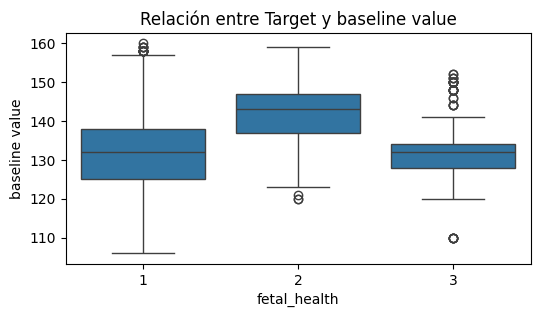

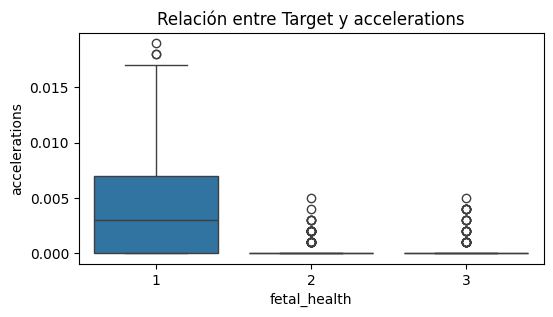

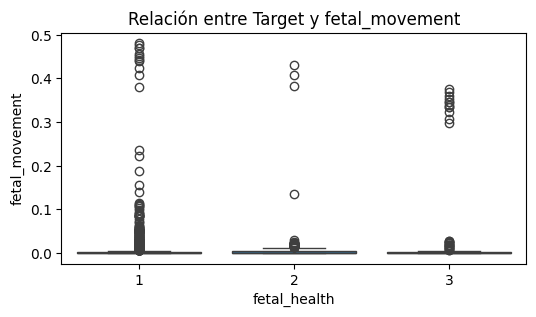

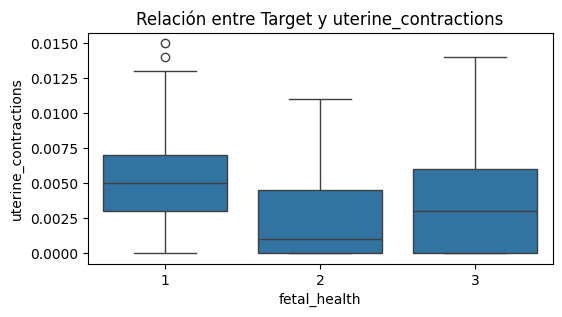

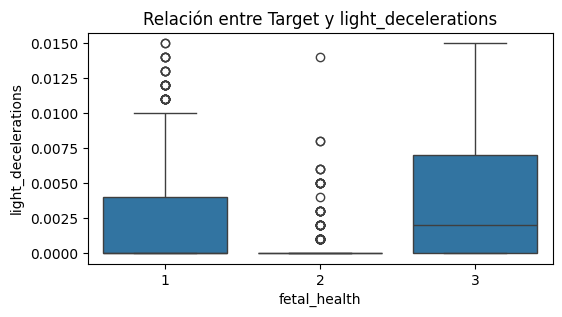

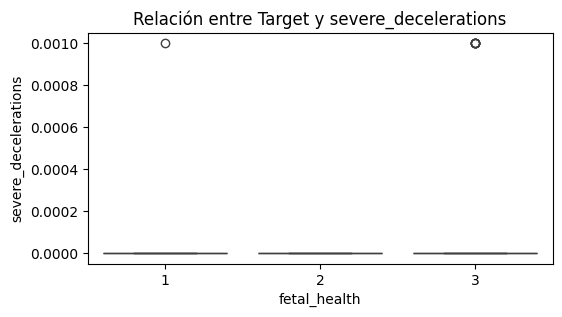

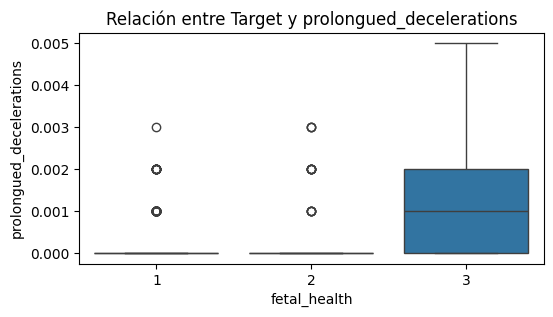

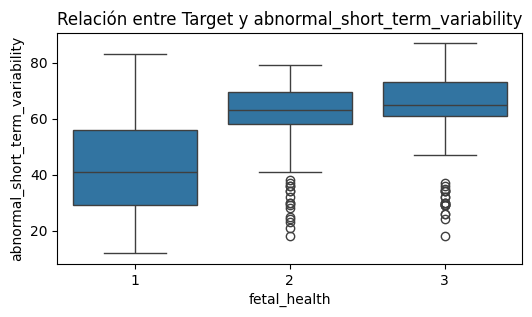

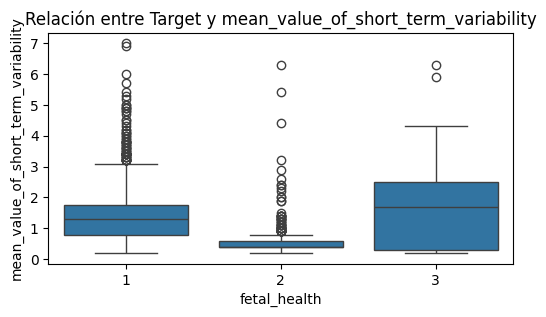

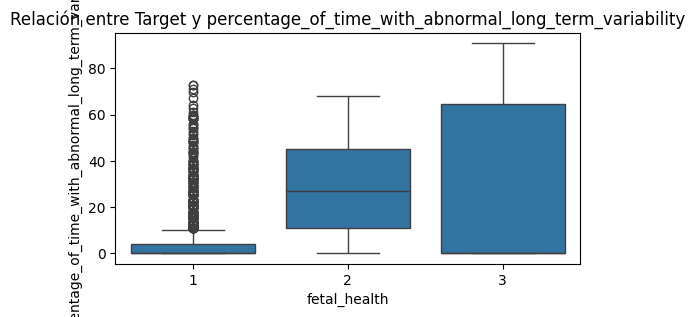

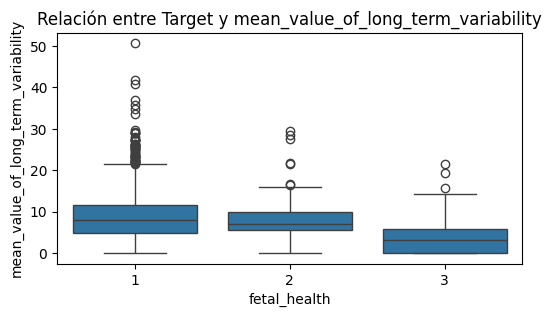

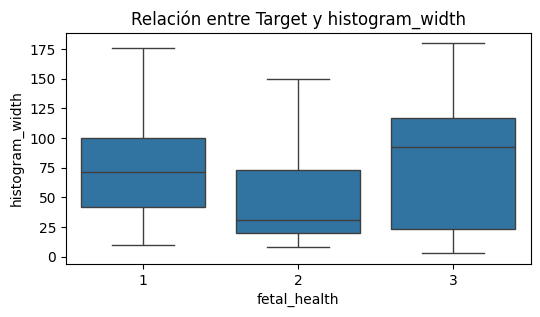

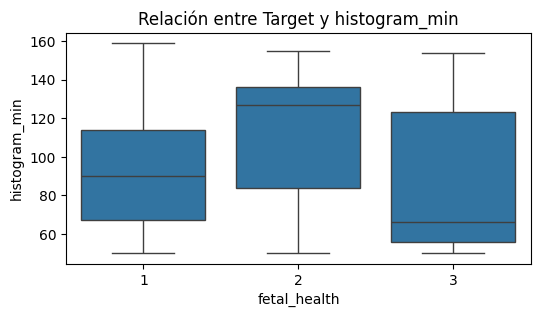

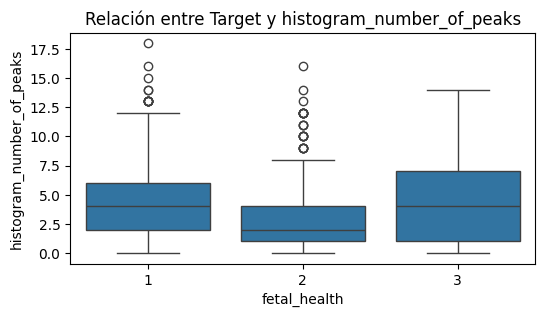

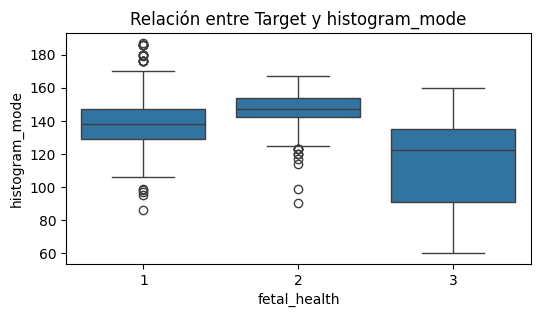

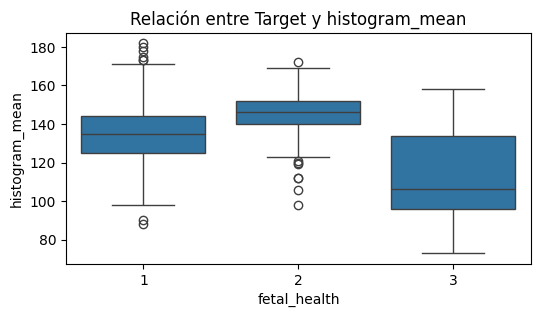

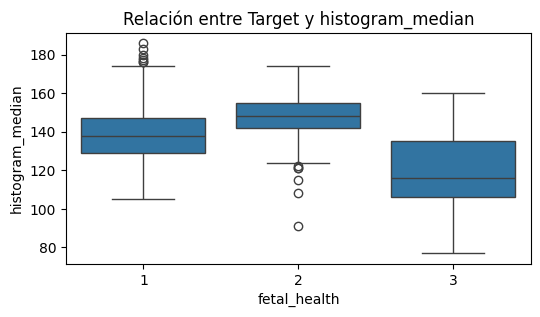

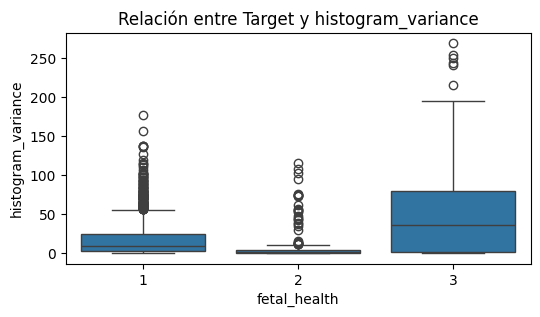

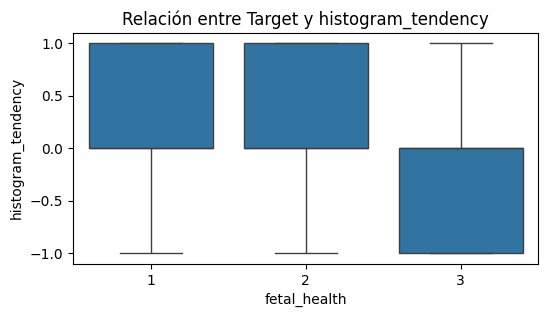

In [111]:
# TODOS
selected_features = list(sig_features.keys())[:19]

# Crear gráficos de caja para los features seleccionados
for feature in selected_features:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x='fetal_health', y=feature, data=df)
    plt.title(f'Relación entre Target y {feature}')
    plt.show()

Se excluyen  las columnas
2-3-5-6-7-18
PORQUE NO SON REPRESENTATIVOS PARA TODOS LOS DATOS, NO GUARDA RELACIÓN
Y hay muchos valores fuera del rango en estos features

In [112]:
list_not=[2,3,5,6,7,18]

In [113]:
selected_features

['baseline value',
 'accelerations',
 'fetal_movement',
 'uterine_contractions',
 'light_decelerations',
 'severe_decelerations',
 'prolongued_decelerations',
 'abnormal_short_term_variability',
 'mean_value_of_short_term_variability',
 'percentage_of_time_with_abnormal_long_term_variability',
 'mean_value_of_long_term_variability',
 'histogram_width',
 'histogram_min',
 'histogram_number_of_peaks',
 'histogram_mode',
 'histogram_mean',
 'histogram_median',
 'histogram_variance',
 'histogram_tendency']

In [114]:
features=[valor for i, valor in enumerate(selected_features) if i+1 not in list_not]

###Features escogidos son:
Son 13 datos

In [115]:
len(features)

13

In [116]:
features

['baseline value',
 'uterine_contractions',
 'abnormal_short_term_variability',
 'mean_value_of_short_term_variability',
 'percentage_of_time_with_abnormal_long_term_variability',
 'mean_value_of_long_term_variability',
 'histogram_width',
 'histogram_min',
 'histogram_number_of_peaks',
 'histogram_mode',
 'histogram_mean',
 'histogram_median',
 'histogram_tendency']

##b. Crear al menos 2 de los modelos de clasificación visto en clase y un modelo de clasificación k-vecinos, donde k es nuestro número de categorías.

## Dividir el conjunto en entrenamiento y prueba.

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df[features]
y = df['fetal_health']

# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##Creación de modelos de clasificación

In [118]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Árbol de decisión
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# K-vecinos más cercanos
k = len(y.unique())  # número de categorías
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=3)

##D. Evaluación de los modelos
Usaremos la precisión de la clasificación y la validación cruzada para evaluar cada modelo.

In [119]:
# Evaluación de Árbol de decisión
dt_scores = cross_val_score(dt_model, X_train_scaled, y_train, cv=5)
print(f"Precisión Árbol de Decisión (CV): {dt_scores.mean():.2f} +/- {dt_scores.std():.2f}")

# Evaluación de Random Forest
rf_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)
print(f"Precisión Random Forest (CV): {rf_scores.mean():.2f} +/- {rf_scores.std():.2f}")

# Evaluación de KNN
knn_scores = cross_val_score(knn_model, X_train_scaled, y_train, cv=5)
print(f"Precisión KNN (CV): {knn_scores.mean():.2f} +/- {knn_scores.std():.2f}")


Precisión Árbol de Decisión (CV): 0.91 +/- 0.02
Precisión Random Forest (CV): 0.93 +/- 0.01
Precisión KNN (CV): 0.89 +/- 0.01


En la evaluación de metodos cruzados se tienen precisiones de 89 a 93 %

El mejor modelo en precisión es 93%

##e. Generar gráficos de nuestros resultados.

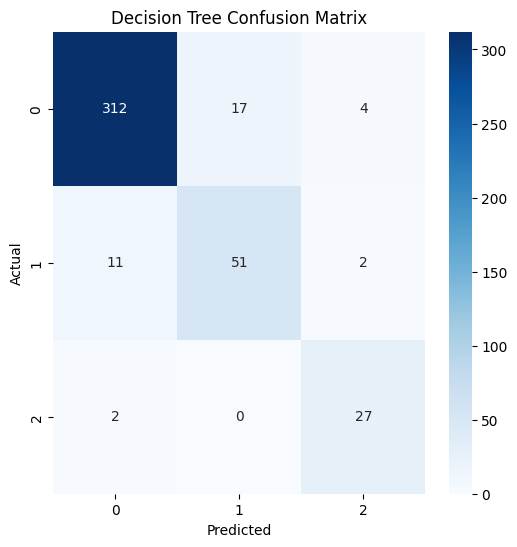

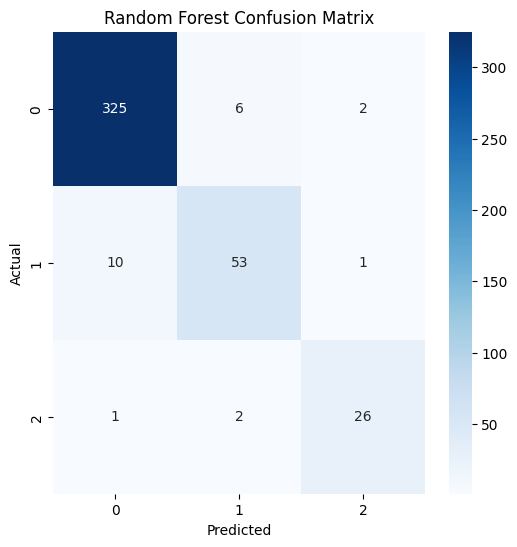

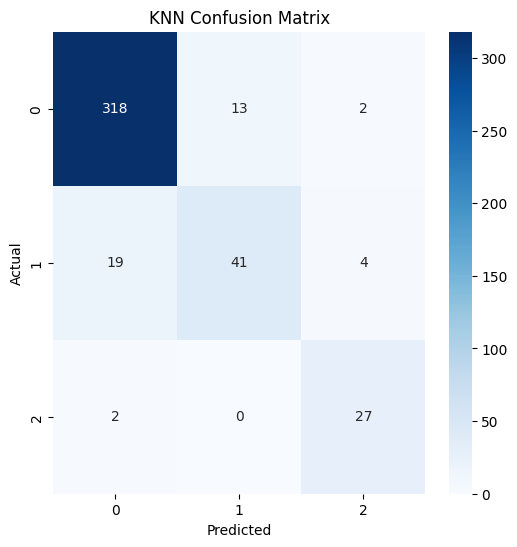

In [120]:
def plot_confusion_matrix(model, X, y, title="Confusion Matrix"):
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

plot_confusion_matrix(dt_model, X_test_scaled, y_test, title="Decision Tree Confusion Matrix")
plot_confusion_matrix(rf_model, X_test_scaled, y_test, title="Random Forest Confusion Matrix")
plot_confusion_matrix(knn_model, X_test_scaled, y_test, title="KNN Confusion Matrix")

###Reporte de la clasificación

In [121]:
# Reporte de clasificación para el Árbol de Decisión
dt_report = classification_report(y_test, dt_model.predict(X_test_scaled))
print("Reporte de Clasificación - Árbol de Decisión:\n", dt_report)

# Reporte de clasificación para Random Forest
rf_report = classification_report(y_test, rf_model.predict(X_test_scaled))
print("Reporte de Clasificación - Random Forest:\n", rf_report)

# Reporte de clasificación para K-vecinos más cercanos
knn_report = classification_report(y_test, knn_model.predict(X_test_scaled))
print("Reporte de Clasificación - KNN:\n", knn_report)

Reporte de Clasificación - Árbol de Decisión:
               precision    recall  f1-score   support

           1       0.96      0.94      0.95       333
           2       0.75      0.80      0.77        64
           3       0.82      0.93      0.87        29

    accuracy                           0.92       426
   macro avg       0.84      0.89      0.86       426
weighted avg       0.92      0.92      0.92       426

Reporte de Clasificación - Random Forest:
               precision    recall  f1-score   support

           1       0.97      0.98      0.97       333
           2       0.87      0.83      0.85        64
           3       0.90      0.90      0.90        29

    accuracy                           0.95       426
   macro avg       0.91      0.90      0.91       426
weighted avg       0.95      0.95      0.95       426

Reporte de Clasificación - KNN:
               precision    recall  f1-score   support

           1       0.94      0.95      0.95       333
      

##Análisis


Para el targe 3 (Pathological), solo hay 29 datos, por los que su precisión y la exactitud son muy bajas para los 3 modelos. (se podría aplicar downsampling o upsampling). Pero los datos son muy pocos, solo 333 del que tiene más frecuencia y 29 de datos muy escasos. Es mucha la variación de crear datos falsos, o recortar muchos datos. Es una limitación, el número de datos.
<p>
 Random Forest es el modelo con mejores metricas. Los resultados con el método de evaluación Cruzada se tienen mejores precisiones para Random Forest.
 <p>
 Aoarentemente no hay la presencia de overffiting.
 La metrica de f1-score que muestra la robustes a la variabilidad. No se ven tan alterados. Exepto para el Árbol de decisiones que presenta,un f1 score para el target 2 muy bajo de 77%. Y para El modelo de KNN de 69% para el target 2.
A diferencia de Random Forest, que muestra una mayor robustes

###Conclusión

Los datos son pocos, solo 333 del que tiene más frecuencia y 29 de datos muy escasos. Es mucha la variación de crear datos falsos, o recortar muchos datos. Es una limitación, el número de datos.
Random Forest tiene las mejores métricas y es más robusto para esta base de datos.

#Verificación de hiperparametros

Tenemos el modelo de Random Forest entrenado, se modificará los hiperparametros, para mejorar las metricas:
- Usando Halving Grid Search
- Usandom Random Search

## Halving Grid Search
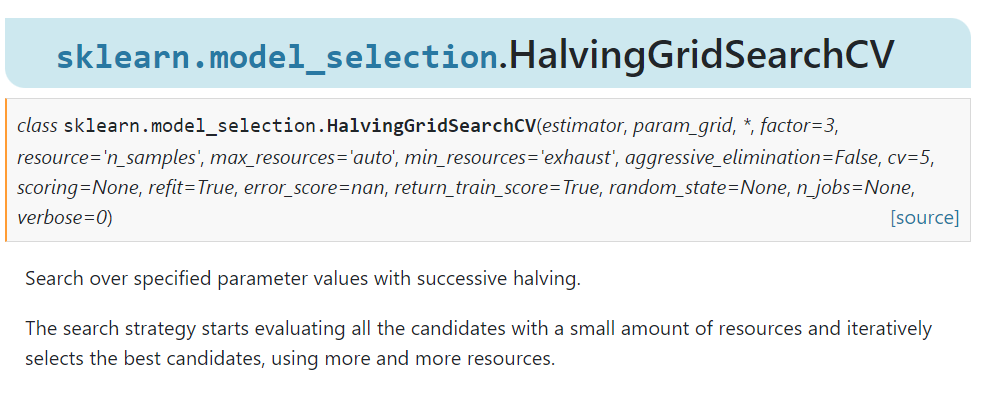

Este método consiste en probar todas las combinaciones posibles de hiperparámetros y seleccionar la combinación que produce el mejor rendimiento del modelo

In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

# Configuración inicial del modelo
# atnerior
#rf = RandomForestClassifier(random_state=42)
rf=rf_model #Del modelo anterior

Utilizando la semilla 42, del anterior challengue

In [130]:
# Definición del espacio de parámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configuración de HalvingGridSearchCV
halving_cv = HalvingGridSearchCV(estimator=rf, param_grid=param_grid, factor=2, scoring=make_scorer(accuracy_score), random_state=42)

# Ajuste del modelo
halving_cv.fit(X_train_scaled, y_train)

# Mejores parámetros y puntuación
print("Mejores parámetros encontrados:", halving_cv.best_params_)
print("Mejor puntuación de validación cruzada:", halving_cv.best_score_)

# Evaluación con el conjunto de prueba
y_pred = halving_cv.predict(X_test_scaled)
print("Puntuación en el conjunto de prueba:", accuracy_score(y_test, y_pred))


Mejores parámetros encontrados: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Mejor puntuación de validación cruzada: 0.928125
Puntuación en el conjunto de prueba: 0.9389671361502347


Los resultados obtendidos del hiperparametro son:
Los accuracy tiene buena relación el conjunto de prueba con la validación cruzada

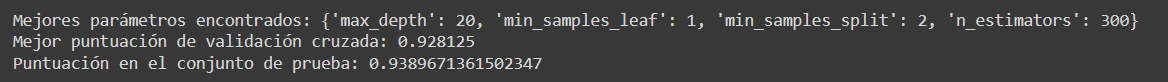

##Random Search
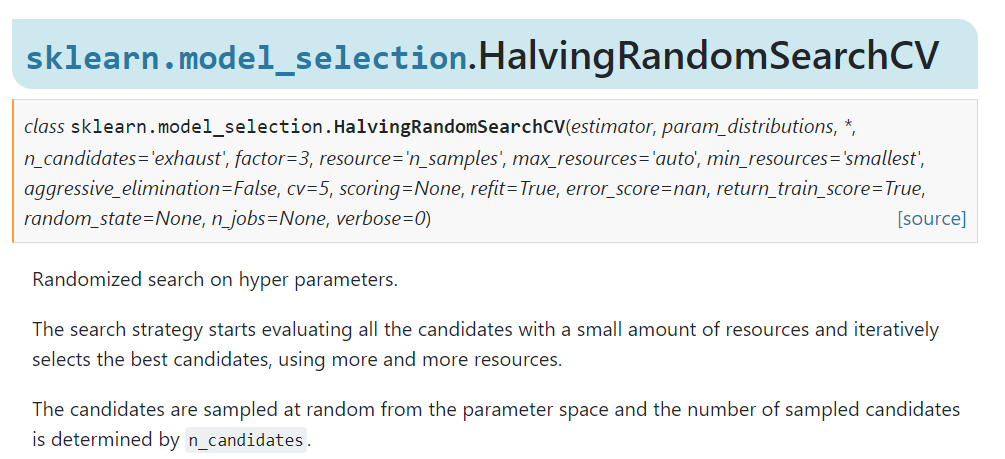

A diferencia de la búsqueda en cuadrícula, la búsqueda aleatoria selecciona aleatoriamente combinaciones de hiperparámetros para probar. Este método puede ser más eficiente que la búsqueda en cuadrícula, especialmente cuando el número de hiperparámetros es grande

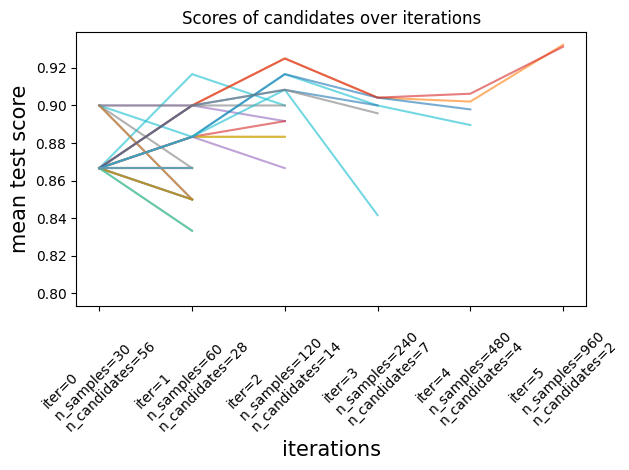

In [136]:
from scipy.stats import randint
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.ensemble import RandomForestClassifier
# Configuración del modelo
clf = rf_model

# Definición del espacio de parámetros
param_dist = {
    "max_depth": [3, 10, None],
    "max_features": randint(1, 11),
    "min_samples_split": randint(2, 11),
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"]
}

# Configuración de HalvingRandomSearchCV
rsh = HalvingRandomSearchCV(
    estimator=clf,
    param_distributions=param_dist,
    factor=2,
    random_state=42
)

# Entrenamiento
rsh.fit(X_train_scaled, y_train)

# Análisis de los resultados
results = pd.DataFrame(rsh.cv_results_)
results['params_str'] = results.params.apply(str)
results.drop_duplicates(subset=('params_str', 'iter'), inplace=True)
mean_scores = results.pivot(
    index='iter', columns='params_str', values='mean_test_score'
)

# Visualización
ax = mean_scores.plot(legend=False, alpha=0.6)
labels = [
    f"iter={i}\nn_samples={rsh.n_resources_[i]}\nn_candidates={rsh.n_candidates_[i]}"
    for i in range(rsh.n_iterations_)
]
ax.set_xticks(range(rsh.n_iterations_))
ax.set_xticklabels(labels, rotation=45, multialignment="left")
ax.set_title("Scores of candidates over iterations")
ax.set_ylabel("mean test score", fontsize=15)
ax.set_xlabel("iterations", fontsize=15)
plt.tight_layout()
plt.show()


Termina en dos candidatos

In [131]:
#modelo base
rf = RandomForestClassifier(random_state=42)

#grilla de parámetros
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar HalvingRandomSearchCV
search = HalvingRandomSearchCV(estimator=rf, param_distributions=param_grid,
                               factor=2, random_state=42, cv=5, n_jobs=-1)

#modelo
search.fit(X_train_scaled, y_train)

# Mejores parámetros encontrados
print("Mejores parámetros:", search.best_params_)

# Evaluación con el conjunto de prueba
best_rf = search.best_estimator_
print("Precisión en conjunto de prueba:", best_rf.score(X_test_scaled, y_test))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Mejores parámetros: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 40}
Precisión en conjunto de prueba: 0.9389671361502347


##PIPELINE

In [132]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [144]:
# Crea el pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Estandarización de las características
    ('classifier', RandomForestClassifier(  # El modelo con los hiperparámetros optimizados
        n_estimators=halving_cv.best_params_['n_estimators'],
        max_depth=halving_cv.best_params_['max_depth'],
        min_samples_split=halving_cv.best_params_['min_samples_split'],
        min_samples_leaf=halving_cv.best_params_['min_samples_leaf'],
        random_state=42
    ))
])

# Realizar validación cruzada
cv_scores = cross_val_score(pipeline, X_train_scaled, y_train, cv=5, scoring='accuracy') #X_train_scaled, y_train se uso en el challengue anterior. Y se mejoro la precisión ligeramente

# Imprimir los resultados de la validación cruzada
print("Resultados de la validación cruzada:", cv_scores)
print("Promedio de la precisión:", cv_scores.mean())
print("Desviación estándar de la precisión:", cv_scores.std())


Resultados de la validación cruzada: [0.94117647 0.92058824 0.93235294 0.91764706 0.94705882]
Promedio de la precisión: 0.9317647058823528
Desviación estándar de la precisión: 0.01137592917989043


###Conclusión

Como se puede ver se mejor la precisión, ligeramente mayor, pero se mantiene en 93%

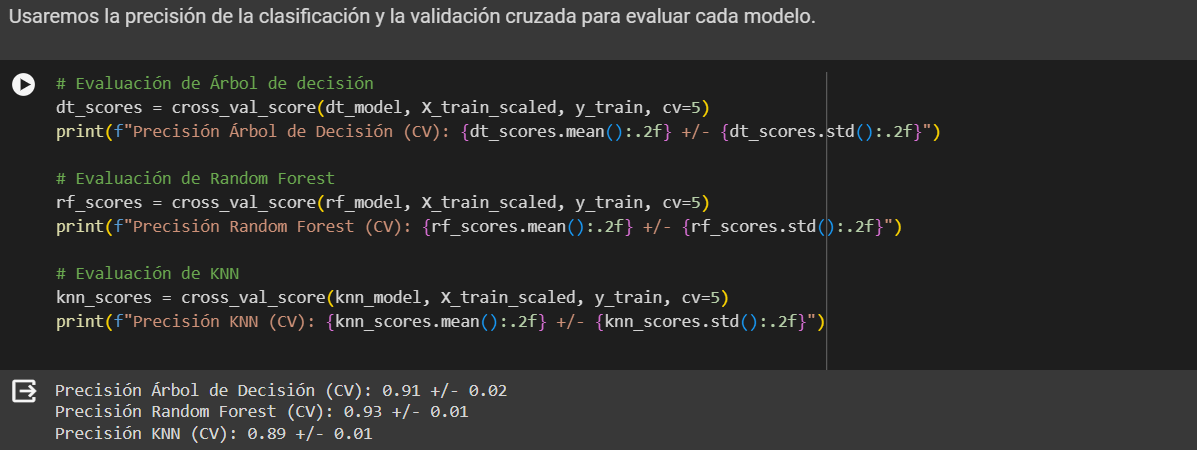